<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC12x**

# **Statistics**

## **Part 1. Bayes Theorem**

Bayes Thoerem은 사전확률에서 정보가 업데이트됨에 따라 사후확률이 어떻게 변화하는지를 나타냅니다. 

다음의 문제에 대해 Bayes Thoerem을 활용하여 사후확률을 구해보세요.

> 여러분은 가게에서 2개의 사탕팩(A, B)을 구매하였습니다. A팩에는 7개의 딸기맛, 3개의 사과맛 사탕이 들어있고, B팩에는 5개의 딸기맛, 5개의 사과맛 사탕이 들어있었습니다. 해당 사탕들을 모두 섞은 후 1개를 뽑았더니 딸기맛이었을 때, 해당 사탕이 A팩에 있었던 사탕이었을 확률은 얼마일까요?





##### **Q1. 사후확률을 반올림하여 소수점 둘째 자리까지 구한 후, 사전확률과 사후확률 결과를 (사전확률, 사후확률)의 형태로 쓰세요.**

In [1]:
tpr=7/10
fpr=5/10

# 사전확률
prior=1/2

a = prior
b = 1 - prior

# evidence
pos_a = tpr
pos_b = fpr

# 사후확률
posterior = (pos_a * a) / ((pos_a * a) + (pos_b * b))
round(prior,2),round(posterior,2)

(0.5, 0.58)

---

## **Part 2. 큰 수의 법칙 & 신뢰 구간**

> **Part 2, Part 3에서 여러분은 가상의 마케팅 데이터를 활용할 것입니다.**

#### 데이터셋 정보 :   
이 데이터셋은 알뜰 구매를 도와주는 XYZ사의 마케팅 정보를 다루고 있으며, 개인 정보는 보호를 위해 제거 되어 있습니다.

**Attribute Information:**

- ID - 고객의 고유값
- Year_Birth - 고객의 출생연도
- Education - 고객의 최종학력
- Marital_Status - 고객의 혼인여부
- Country - 고객의 국적
- Income - 고객의 연간 수입
- Kidhome - 자녀가 미취학아동인지 여부 (1 - yes, 0 - no)
- Teenhome - 자녀가 10대 청소년인지 여부 (1 - yes, 0 - no)
- Dt_Customer - 서비스 가입 시기
- Recency - 마지막 구매 시기 (일)
- MntWines - 최근 2년간 구매한 와인 구매 총액
- MntFruits- 최근 2년간 구매한 과일 구매 총액
- MntMeatProducts - 최근 2년간 구매한 정육 구매 총액
- MntFishProducts - 최근 2년간 구매한 어류 구매 총액
- MntSweetProducts - 최근 2년간 구매한 과자 구매 총액
- MntGoldProds - 최근 2년간 구매한 황금 구매 총액
- NumDealsPurchases - 할인을 통해 제품을 구매한 횟수
- NumWebPurchases - 회사의 웹사이트를 통해 구매한 횟수
- NumStorePurchases - 가게에서 직접 구매한 횟수
- NumWebVisitsMonth - 회사의 웹사이트를 방문한 횟수
- Complain - 고객의 최근 2년간 회사에 대한 클레임 여부 (1 - yes, 0 - no)

### **2-1. 데이터셋 살펴보기**

- 데이터셋을 데이터프레임 형태로 불러오세요.
- `Income` column 이름 앞뒤의 공백을 제거하세요.
- 데이터셋의 결측치를 살펴보고, 있다면 제거하고 인덱스를 재설정하세요.
- `Income`의 데이터타입을 `int`로 변경하세요.
  - 필요시 다음의 코드를 활용해보세요.
  

  ```python
  import re

  def cleaning(df):
    li = []
    for row in df['Income']:
      splited = row.split('.') # .을 기준으로 문자열을 분리합니다.
      result = re.sub('[^0-9]','', splited[0]) # .기준 앞 부분만 활용하여 숫자가 아닌 문자는 공백으로 치환합니다.
      li.append(int(result))
  
    df['Income'] = li
  ```

- `Income`의 이상치를 제거하세요.
  - 다음의 코드를 통해 `Income`의 분포를 비교해보세요.

  ```python
  plt.hist(df['Income']);

  plt.hist(df.loc[df['Income'] < 120000, 'Income']);
  ```

  - `Income`이 120000 이상이 되는 값은 이상치로 간주하여 해당 row를 삭제하고 인덱스를 재설정하세요.

- 위의 전처리 과정을 완료한 데이터프레임을 `df_final` 변수로 저장하세요.

In [2]:
import pandas as pd
import numpy as np

from google.colab import files
upload=files.upload()

Saving sc_12_data.csv to sc_12_data.csv


In [3]:
df = pd.read_csv('/content/sc_12_data.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Country', 'Education',
       'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain'],
      dtype='object')

In [5]:
df = df.rename(columns={' Income ': 'Income'})
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Country', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0            0
ID                    0
Year_Birth            0
Country               0
Education             0
Marital_Status        0
Income               21
Kidhome               0
Teenhome              0
Dt_Customer           0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumDealsPurchases     0
NumWebPurchases       0
NumStorePurchases     0
NumWebVisitsMonth     0
Complain              0
dtype: int64

In [7]:
df = df.dropna()
df = df.reset_index(drop=True)
df.isnull().sum()

Unnamed: 0           0
ID                   0
Year_Birth           0
Country              0
Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumDealsPurchases    0
NumWebPurchases      0
NumStorePurchases    0
NumWebVisitsMonth    0
Complain             0
dtype: int64

In [8]:
import re

def cleaning(df):
    li = []
    for row in df['Income']:
      splited = row.split('.') # .을 기준으로 문자열을 분리합니다.
      result = re.sub('[^0-9]','', splited[0]) # .기준 앞 부분만 활용하여 숫자가 아닌 문자는 공백으로 치환합니다.
      li.append(int(result))

    df['Income'] = li

In [9]:
cleaning(df)
df.Income

0       84835
1       57091
2       67267
3       32474
4       21474
        ...  
2114    78901
2115    66476
2116    31056
2117    46310
2118    65819
Name: Income, Length: 2119, dtype: int64

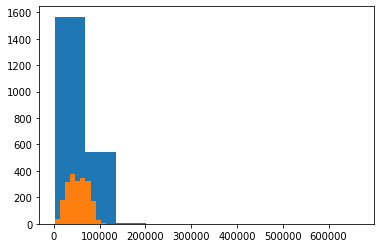

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['Income']);

plt.hist(df.loc[df['Income'] < 120000, 'Income']);

In [42]:
#Income이 120000 이상이 되는 값은 이상치로 간주하여 해당 row를 삭제하고 인덱스를 재설정하세요.
df_final = df.query("Income < 120000")
df_final = df_final.reset_index(drop=True)
#Income만 들고왔는데 도전과제를 위해 전체 데이터를 들고 왔었어야함
#df_final = df_final.Income (원래 코드)
df_final.shape

(2111, 22)

In [36]:
# 레퍼런스 풀이
# outlier = df.loc[df['Income'] >= 120000, 'Income'].index

# final = df.copy()

# final = final.drop(labels=outlier, axis=0).reset_index(drop=True)

# final.shape

(2111, 22)

##### **Q2. `df_final`의 행의 개수를 쓰세요.**

In [12]:
# 아래의 코드를 실행해 주세요. 업그레이드 완료 후에는 런타임을 재시작해야 합니다. 
!pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
df_final.shape[0]

2111

### **2-2. sample의 평균값과 모집단의 평균값을 비교해봅니다.**

- `seed`는 2로 지정하세요.
  - 동일한 결과값을 도출하기 위해, seed 지정 코드 하단에 이 문제에 대한 코드를 작성해주세요.
- `df_final`을 모집단으로 가정한 후, `Income` column의 평균을 구해 `mean_pop` 변수에 저장하세요.
- sample size가 5일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_5` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_5`의 평균을 뺀 값을 `diff_5`에 저장하세요.
- sample size가 200일 때, 해당 데이터셋의 `Income` 데이터를 10,000번 중복 추출한 표본 평균들을 `sample_200` 라는 이름의 array에 저장하세요.
  - `mean_pop`에서 `sample_200`의 평균을 뺀 값을 `diff_200`에 저장하세요.




##### **Q3. `diff_5`, `diff_200`의 결과를 각각 반올림하여 소수점 둘째 자리까지 (`diff_5`, `diff_200`)의 형태로 쓰세요.**

- 동일한 결과값을 도출하기 위해, seed 지정 코드를 반드시 실행 해야 합니다.
- 2-2 문제를 푸는데 필요한 모든 내용이 seed 지정 코드가 있는 셀에 들어가도록 코드를 작성해주세요.


In [14]:
import random
# seed 지정 (반드시 실행)
np.random.seed(2)

# 이곳에 2-2번 문제에 대한 모든 코드를 작성하세요.
mean_pop=df_final.mean()
sample_5 = []
for i in range(10000):
  sample=np.random.choice(df_final,5,replace=True)
  sample_5.append(sample.mean())

sample_5 = np.array(sample_5)
diff_5 = mean_pop-sample_5.mean()

sample_200 = []
for i in range(10000):
  sample=np.random.choice(df_final,200,replace=True)
  sample_200.append(sample.mean())

sample_200 = np.array(sample_200)
diff_200 = mean_pop-sample_200.mean()

round(diff_5,2),round(diff_200,2)

(101.97, 11.35)

### **2-3. sample의 분포를 통해 신뢰구간을 확인합니다.**
**2-2**에서 구현한 `sample_200` 표본 분포를 활용하여 모집단의 모수를 포함할 확률이 95%가 되는 구간을 찾아봅니다.



##### **Q4. 95% 신뢰구간의 lower limit과 upper limit을 각각 반올림하여 소수점 둘째 자리까지 (lower limit, upper limit)의 형태로 쓰세요.**

In [15]:
lower, upper = np.percentile(sample_200, 2.5), np.percentile(sample_200, 97.5) 
round(lower,2),round(upper,2)

(48895.97, 54727.84)

## **Part 3. Hypothesis Test**

데이터에서 다양한 시나리오를 파악하고 옳은 가설을 세우는 것은 매우 중요합니다. 위에 우리에게 주어진 데이터셋에 대해서도 다양한 시나리오에 대해 생각해볼 수 있습니다.

주어진 데이터셋에는 자녀가 청소년인지 여부를 나타내는 `Teenhome`과 연간 수입을 나타내는 `Income` 정보가 존재하는데, 청소년 자녀가 있는 경우 자녀의 연령에 따라 증가하는 지출, 고객의 회사 내 지위 등을 고려하여 수입이 증가할 것이라는 가설을 생각해 볼 수 있습니다. 

따라서 **고객의 자녀가 청소년인지 여부에 따라 연간 수입 평균값의 차이가 있는지** 가설검정을 통해 확인해보도록 하겠습니다.

### **3-1. One-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우보다 더 많은지 가설 검증을 시행하고자 합니다. ($\alpha$ = 0.05)
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$







- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.
  - `equal_val` 파라미터를 False로 지정합니다.

##### **Q5. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?**

a. $H_0$: $μ_{no} ≥ μ_{yes}\;$, $\;H_a$: $μ_{no} < μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} > μ_{yes}\;$, $\;H_a$: $μ_{no} ≤ μ_{yes}$

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$





**`이곳에 Q5에 대한 답을 작성하세요.`**

In [16]:
# a

##### **Q6. 다음 중 위의 가설검정 결과로 나온 p-value를 통해 도출한 결론을 고르세요.** 

a. p-value가 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다.

b. p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다.

c. p-value가 0.05보다 작으므로 귀무가설을 기각하지 못한다.

d. p-value가 0.05보다 크므로 귀무가설을 기각하고 대립가설을 채택한다.

e. p-value가 0.05보다 크므로 귀무가설과 대립가설 모두를 채택한다.

In [34]:
df_final.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2111 entries, 0 to 2110
Series name: Income
Non-Null Count  Dtype
--------------  -----
2111 non-null   int64
dtypes: int64(1)
memory usage: 16.6 KB


In [44]:
import scipy.stats
#Teenhome 0이 없는경우 1이 있는경우, Income

'''
*원본코드
df에서 하는줄 알았는데 df_final의 데이터로 하는 것
게다가 df_final은 Income만 들고 왔어서 수정함
df_0=df.query("Teenhome==0").Income
df_1=df.query("Teenhome==1").Income
scipy.stats.ttest_ind(df_0,df_1,equal_var=False,alternative='less').pvalue
'''

df_0=df_final.query("Teenhome==0").Income
df_1=df_final.query("Teenhome==1").Income
pval1 = scipy.stats.ttest_ind(df_0,df_1,equal_var=False,alternative='less').pvalue
round(pval1,3)

0.051

In [45]:
df_0.mean()

51134.12989323843

**`이곳에 Q6에 대한 답을 작성하세요.`**

### **3-2. Two-tailed Test**

> 고객의 자녀가 청소년인 경우의 연간 수입 평균값이 그렇지 않은 경우와 차이가 있는지 가설검정을 시행하고자 합니다. ($\alpha$ = 0.05)
- 자녀가 청소년인 경우 고객의 연간 수입 평균값: $μ_{yes}$
- 자녀가 청소년이 아닌 경우 고객의 연간 수입 평균값: $μ_{no}$

- 이번 문제에서는 scipy 라이브러리의 [`.ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)를 사용하여 가설검정을 진행하세요.
  - `equal_val` 파라미터를 False로 지정합니다.






##### **Q7. 이 경우에는 귀무가설과 대립가설을 어떻게 세워야 할까요?** 

a. $H_0$: $μ_{no} \neq\; μ_{yes}\;$, $\;H_a$: $μ_{no} = \;μ_{yes}$

b. $H_0$: $μ_{no} < μ_{yes}\;$, $\;H_a$: $μ_{no} ≥ μ_{yes}$

c. $H_0$: $μ_{no} =\; μ_{yes}\;$, $\;H_a$: $μ_{no} \neq \;μ_{yes}$ 

d. $H_0$: $μ_{no} ≤ μ_{yes}\;$, $\;H_a$: $μ_{no} > μ_{yes}$

</br>







**`이곳에 Q7에 대한 답을 작성하세요.`**

##### **Q8. 위의 가설 검정 결과로 나온 p-value를 반올림하여 소수점 셋째 자리까지 쓰세요.**

In [18]:
'''
원본 코드는 맞았지만 위에서 df_final의 데이터셋으로 하는 줄 모르고
df_final은 Income만 들고 왔었고 그리고 이상치 제거를 안한 df데이터 셋으로 했어서 결과가 이상하게 나옴
'''
#round(scipy.stats.ttest_ind(df_0,df_1,equal_var=False).pvalue,3)

0.542

In [46]:
round(scipy.stats.ttest_ind(df_0,df_1,equal_var=False).pvalue,3)

0.101

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 내용 또한 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항은 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

---

#### **$\chi^2$ 가설 검정을 시행합니다**

우리가 사용할 $\chi^2$ - test는 어떤 경우에 사용하는 가설 검정 방법인지 알아봅시다.


- one sample $\chi^2$ - test (적합도 검정)
  > **주어진 하나의 범주형 변수의 분포가 특정 예상되는 분포와 동일한 분포를 나타내는지** 에 대한 가설 검정 방법

  - 귀무가설($H_0$): 주어진 변수 X의 관측분포와 특정 예상 분포가 동일하다.
  - 대립가설($H_a$): 주어진 변수 X의 관측분포와 특정 예상 분포가 다르다.

- two sample $\chi^2$ - test (독립성 검정)
  > **두 개의 범주형 변수가 서로 연관되어 있는지 여부**에 대한 가설 검정 방법

  - 귀무가설($H_0$): 변수 X와 Y는 서로 독립이다. (연관 없음)
  - 대립가설($H_a$): 변수 X와 Y는 서로 독립이 아니다. (연관 있음)

</br>

위의 가설검정 방법에 대한 설명을 참고하여 진행해봅니다.


### **4-1. one sample $\chi^2$ - test**

> XYZ사는 다국적 기업으로 다양한 나라에 고객층을 확보하고 있으며, 5월을 맞아 **기혼자를 대상으로 한 이벤트를 기획**하려고 합니다. 이때, 우리는 모든 국가를 대상으로 이벤트를 진행하는 것이 효율적인지 $\chi^2$ - test를 통해 확인해보려 합니다. 만약 국적별 기혼자의 빈도가 비슷하다면, XYZ사는 모든 국가를 대상으로 이벤트를 진행하는 것을 고려할 것이고, 그렇지 않다면, 어떤 국적의 고객이 더 많은지 파악하는 추가 분석이 필요할 것입니다.


#### **기혼자의 빈도가 모든 나라에 대해 균일한지 가설 검정을 해보세요.**

---

[공식문서](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)를 참고하여 아래에 명시된 가설을 검정해봅시다. ($\alpha$ = 0.05)
- 귀무가설($H_0$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있다.
- 대립가설($H_a$): 고객의 국적(Country)별 기혼자(Married)의 빈도가 균일하게 분포되어 있지 않다.

> **Hint:** categorical feature 간의 "cross tab"을 생성하여 탐색해 보세요 (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)). 그리고 $\chi^2 test$를 적용해 보세요. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)을 사용하면 contingency table 을 생성할 수 있습니다.

In [ ]:
'''
아랫 코드 역시 df_final로 했어야 했다.
df를 df_final로 수정
'''

In [48]:
table = pd.crosstab(df_final['Country'], df_final['Marital_Status'])
table

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Country,,,,,,,,
AUS,1,0,18,63,17,36,5,0
CA,1,3,26,94,56,62,6,1
GER,0,0,6,56,18,31,4,0
IND,0,0,10,51,35,36,4,1
ME,0,0,0,0,2,1,0,0
SA,0,0,43,103,66,91,12,0
SP,0,0,102,413,230,264,42,0
US,0,0,16,32,28,23,2,0


In [21]:
'''
처음 결과 (1158.9975460122698, 5.185732237599381e-246)
statistic, p_value = scipy.stats.chisquare(table.Married)
statistic,p_value
'''

(1158.9975460122698, 5.185732237599381e-246)

In [49]:
#df를 df_final로 수정 결과
statistic, p_value = scipy.stats.chisquare(table.Married)
statistic,p_value

(1165.7733990147783, 1.777339802509078e-247)

In [51]:
#레퍼런스 코드 

# 기혼자 명수 총합
married_ppl = sum(table.Married)
married_ppl

812

In [52]:
#레퍼런스 코드

# 국적 수
len(df_final['Country'].unique())

8

In [53]:
#레퍼런스 코드

# 기혼('Married')에 해당하는 전체 데이터 수를 국적 수(8)으로 나눈 빈도 = 우리의 기대 분포 (국적별 빈도가 균일함)
exp = [married_ppl / 8]
exp_f = exp * 8
exp_f

# option 2) 실제 분포와 기대 분포 직접 비교
stats2, pvalue2 = scipy.stats.chisquare(table.Married, exp_f)
pvalue2

1.777339802509078e-247

In [50]:
#pd.crosstab()과의 차이
#국적별에 ME가 제외됨
df_M  = df_final.groupby('Country')['Marital_Status'].value_counts().loc[:,'Married']
df_M

Country
AUS     63
CA      94
GER     56
IND     51
SA     103
SP     413
US      32
Name: Marital_Status, dtype: int64

In [23]:
statistic, p_value = scipy.stats.chisquare(df_M)
statistic,p_value

(912.2478527607361, 8.451537023686116e-194)

### **4-2. P-value 해석**



#### **가설검정 결과로 나온 p-value를 바탕으로 결론을 제시하세요.**

##### **Q9. p-value와 귀무가설 기각 여부를 (`p-value`, `귀무가설 기각 여부`) 형태로 쓰세요.**

- p-value는 소수점 둘째 자리까지 표시합니다.
- 귀무가설 기각 여부는 `O`, `X` 로 표시합니다.
  - `O` : 귀무가설 기각
  - `X` : 귀무가설 기각 실패

**`이곳에 답을 작성하세요.`**

pvalue가 0.05보다 작은 1.777339802509078e-247 임으로 귀무가설을 기각합니다

In [54]:
round(1.777339802509078e-247,2)

0.0